In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing=load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
#housing.hist(bins=50,figsize=(20,15))
#plt.show()


In [7]:
import numpy as np
def split_train_test(data=housing,test_ratio=0.2):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    test_indices=shuffle[:test_size]
    train_indices=shuffle[test_size:]
    return data.loc[train_indices],data.loc[test_indices]


In [8]:
train_data,test_data=split_train_test()

In [9]:
housing_with_id=housing.reset_index()

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(housing,test_size=0.1,random_state=42)

In [11]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [12]:
housing["income_cat"].head(15)

0     5.0
1     5.0
2     5.0
3     4.0
4     3.0
5     3.0
6     3.0
7     3.0
8     2.0
9     3.0
10    3.0
11    3.0
12    3.0
13    2.0
14    2.0
Name: income_cat, dtype: float64

In [13]:
housing.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit 

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
strat_train_set["income_cat"].value_counts()/len(housing)

3.0    0.280475
2.0    0.255087
4.0    0.141037
5.0    0.091521
1.0    0.031880
Name: income_cat, dtype: float64

In [17]:
strat_test_set["income_cat"].value_counts()/len(housing)

3.0    0.070107
2.0    0.063760
4.0    0.035271
5.0    0.022917
1.0    0.007946
Name: income_cat, dtype: float64

In [18]:
for i in (strat_train_set,strat_test_set):
    i.drop(["income_cat"],axis=1,inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

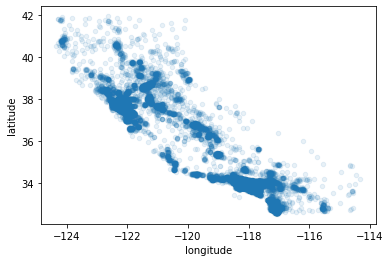

In [19]:
train_copy=strat_train_set.copy()
train_copy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

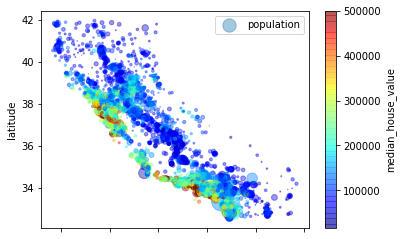

In [20]:
train_copy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=train_copy['population']/100,label='population',c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.show()

In [21]:
corr=train_copy.corr()

In [22]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [23]:
train_copy["rooms_per_household"]=train_copy["total_rooms"]/train_copy["households"]
train_copy["bedrooms_per_room"]=train_copy["total_bedrooms"]/train_copy["total_rooms"]
train_copy["population_per_household"]=train_copy["population"]/train_copy["households"]

In [24]:
corr=train_copy.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [25]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_label=strat_train_set["median_house_value"]

In [26]:
from sklearn.impute import SimpleImputer

imputer_median=SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)
imputer_median.fit(housing_num)
X=imputer_median.transform(housing_num)

In [27]:
housing_tranformed=pd.DataFrame(X,columns=housing_num.columns)
housing_tranformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [28]:
#from sklearn.preprocessing import LabelEncoder

#encoder=LabelEncoder()
#housing_cat=housing["ocean_proximity"].copy()
#housing_cat_encoded=encoder.fit_transform(housing_cat)
#housing_cat_encoded=housing_cat_encoded.reshape(-1,1)

In [29]:
#from sklearn.preprocessing import OneHotEncoder

#encoder=OneHotEncoder()
#housing_cat_1hot=encoder.fit_transform(housing_cat_encoded)
#housing_cat_1hot.toarray()

In [30]:
#from sklearn.preprocessing import OneHotEncoder

#encoder=OneHotEncoder()
#housing_cat_1hot=encoder.fit_transform(housing_cat)
#housing_cat_1hot

In [31]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import LabelBinarizer
households_ix=6
rooms_ix=3
population_ix=5
bedrooms_ix=4
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        #X=X.values
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms:
            bedrooms_per_household=X[:,bedrooms_ix]/X[:,households_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_household]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
class CustomLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self,sparse_output=False):
        self.sparse_output=sparse_output
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        encoder=LabelBinarizer(sparse_output=self.sparse_output)
        return encoder.fit_transform(X)
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributes):
        self.attributes=attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attributes].values

In [32]:
#attr_adder=CombinedAttributesAdder(False)
#housing_added_attr=attr_adder.transform(housing)

In [33]:
m=housing.columns
m=m.append(pd.Index(['rooms_per_household']))
m=m.append(pd.Index(['population_per_household']))
m

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household'],
      dtype='object')

In [34]:
#housing_added_attr=pd.DataFrame(housing_added_attr,columns=m)
#housing_added_attr.head()

In [35]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler
num_attributes=  list(housing_num)
cat_attributes=["ocean_proximity"]

num_pipeline=Pipeline([('selector',DataFrameSelector(num_attributes)),('imputer',SimpleImputer(strategy='median')),('attr_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler())])
cat_pipeline=Pipeline([('selector',DataFrameSelector(cat_attributes)),('label_binarizer',CustomLabelBinarizer())])
full_pipeline=FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),('cat_pipeline',cat_pipeline)])
housing_full=full_pipeline.fit_transform(housing)
housing_full.shape

(16512, 16)

In [36]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(housing_full,housing_label)

LinearRegression()

In [37]:
from sklearn.model_selection import cross_val_score

def  display_scores(model):
    score=cross_val_score(model,housing_full,housing_label,scoring='neg_mean_squared_error',cv=10)
    score=np.sqrt(-score)
    print("Scores:",score)
    print("mean:" ,score.mean())
    print("std-dev:",score.std())

In [38]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor()
dec_reg.fit(housing_full,housing_label)

DecisionTreeRegressor()

In [39]:
from sklearn.ensemble import RandomForestRegressor
rand_reg=RandomForestRegressor()
rand_reg.fit(housing_full,housing_label)

RandomForestRegressor()

In [40]:
display_scores(linreg)

Scores: [67474.11780426 67233.22466524 69301.86479972 74716.01783105
 68426.80214612 71609.98356263 65200.14338307 68687.78826919
 72262.43484426 68111.81213342]
mean: 69302.41894389638
std-dev: 2653.460699447043


In [41]:
display_scores(dec_reg)

Scores: [70832.43829666 70815.84950819 71900.92000998 71621.94844466
 69637.18148451 73927.94294167 71340.35813963 70264.26501448
 76782.92363152 69992.9703101 ]
mean: 71711.67977813927
std-dev: 2043.016699061232


In [42]:
display_scores(rand_reg)

Scores: [49409.11793492 47577.22216758 49669.56013492 52806.39072514
 49610.48412187 53469.73181314 49005.8839892  48081.7538077
 53254.45337659 50367.94871638]
mean: 50325.254678744684
std-dev: 2018.2085371969788


In [43]:
from sklearn.model_selection import GridSearchCV
params=[{'n_estimators':[3,10,30],'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
rand_reg=RandomForestRegressor()
search=GridSearchCV(rand_reg,params,cv=5,scoring='neg_mean_squared_error')
search.fit(housing_full,housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [44]:
search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [45]:
full_model=search.best_estimator_

In [46]:
result=search.cv_results_
for mean_sqr,params in zip(result['mean_test_score'],result['params']):
    print(np.sqrt(-mean_sqr),params)

63969.393744360095 {'max_features': 2, 'n_estimators': 3}
55699.19662420124 {'max_features': 2, 'n_estimators': 10}
53242.24091291149 {'max_features': 2, 'n_estimators': 30}
59671.31309985161 {'max_features': 4, 'n_estimators': 3}
52297.726435874145 {'max_features': 4, 'n_estimators': 10}
50178.20467447462 {'max_features': 4, 'n_estimators': 30}
58553.47491404422 {'max_features': 6, 'n_estimators': 3}
52206.94772402248 {'max_features': 6, 'n_estimators': 10}
49782.55705307552 {'max_features': 6, 'n_estimators': 30}
58716.01044550417 {'max_features': 8, 'n_estimators': 3}
52136.83683252056 {'max_features': 8, 'n_estimators': 10}
49659.22670279836 {'max_features': 8, 'n_estimators': 30}
63263.7292602046 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54479.10594028864 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60719.185967180725 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53193.027230824555 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [47]:
X_test=strat_test_set.drop('median_house_value',axis=1)
Y_test=strat_test_set['median_house_value'].copy()
X_test_full=full_pipeline.transform(X_test)
prediction=full_model.predict(X_test_full)

In [48]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(Y_test,prediction)
rmse=np.sqrt(error)
print('Root_Mean_Squared_error:',rmse)

Root_Mean_Squared_error: 47775.2581413366
